In [1]:
import numpy as np
import pandas as pd
import random
import numpy.polynomial.polynomial as poly
from numpy.linalg import inv
import matplotlib.pyplot as plt

# 1. Sampling
## 1.1

In [2]:
def one_unif_sample():
    val = np.random.uniform(0, 1, 1)
    if val < 0.2:
        return "Movies"
    elif 0.2 <= val and val < 0.6:
        return "COMP551"
    elif 0.6 <= val and val < 0.7:
        return "Playing"
    else:
        return "Studying"

In [3]:
one_unif_sample()

'Playing'

In [4]:
np.random.multinomial(1, [0.2, 0.4, 0.1, 0.3])

array([1, 0, 0, 0])

## 1.2

In [5]:
# Input is the number of days to sample for
# Output is an array of fractions having size 4 (one fraction per daily activity)
def many_unif_sample(n):
    sample = np.random.uniform(0, 1, n)
    result = [0]*4
    for val in sample:
        if val < 0.2:
            result[0] += 1
        elif 0.2 <= val and val < 0.6:
            result[1] += 1
        elif 0.6 <= val and val < 0.7:
            result[2] += 1
        else:
            result[3] += 1
    return [total / n for total in result]

In [6]:
many_unif_sample(100)

[0.21, 0.45, 0.08, 0.26]

In [7]:
many_unif_sample(1000)

[0.221, 0.397, 0.101, 0.281]

# 2. Model Selection

In [8]:
data1_train = pd.read_csv('Dataset_1_train.csv', header=None)
data1_valid = pd.read_csv('Dataset_1_valid.csv', header=None)
data1_test = pd.read_csv('Dataset_1_test.csv', header=None)

In [9]:
data1_train = data1_train.dropna(axis='columns')
data1_valid = data1_valid.dropna(axis='columns')
data1_test = data1_test.dropna(axis='columns')

data1_train.columns = ['Input', 'Target']
data1_valid.columns = ['Input', 'Target']
data1_test.columns = ['Input', 'Target']

## 2.1

### 2.1.a

In [10]:
def polyfit(X, Y, n):
    m = np.size(X)
    matrix = np.zeros(shape=(m, n+1))
    for i in range(n+1):
        matrix[:,i] = X**i
    return np.dot(inv(np.dot(matrix.transpose(), matrix)), np.dot(matrix.transpose(), Y))

In [11]:
def polyval(X, parameters):
    n = np.size(parameters)
    m = np.size(X)
    matrix = np.zeros(shape=(m, n))
    for i in range(n):
        matrix[:,i] = X**i
    return np.matmul(matrix, parameters)

In [12]:
parameters = polyfit(data1_train['Input'], data1_train['Target'], 20)

In [13]:
prediction_train = polyval(data1_train['Input'], parameters)
MSE_train = np.mean((prediction_train - data1_train['Target'])**2)
MSE_train

6.474989992909628

In [14]:
prediction_valid = polyval(data1_valid['Input'], parameters)
MSE_valid = np.mean((prediction_valid - data1_valid['Target'])**2)
MSE_valid

1425.1904791069808

### 2.1.b

In [15]:
# The Predicted results
f = poly.Polynomial(parameters)

(-50, 50)

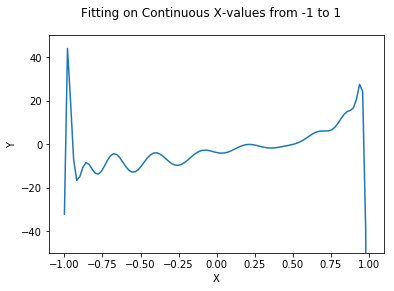

In [16]:
x = np.linspace(-1,1,100)
fig = plt.figure()
plt.plot(x, f(x))
fig.suptitle('Fitting on Continuous X-values from -1 to 1')
# plt.plot(data1_train['Input'], data1_train['Target'], 'bo')
# plt.plot(data1_valid['Input'], data1_valid['Target'], 'ro')
# plt.plot(data1_test['Input'], data1_test['Target'], 'go')
plt.xlabel('X')
plt.ylabel('Y')
plt.ylim(-50, 50)

(-50, 50)

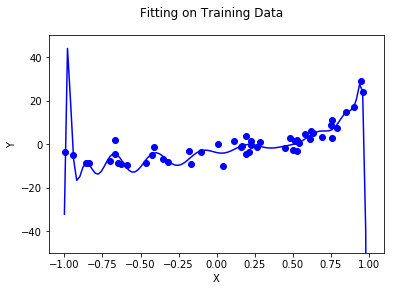

In [17]:
# The training set
x = np.linspace(-1,1,100)
# x = data1_train['Input'].sort_values()
fig = plt.figure()
plt.plot(x, f(x), 'b')
plt.plot(data1_train['Input'], data1_train['Target'], 'bo')
fig.suptitle('Fitting on Training Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.ylim(-50, 50)

(-50, 50)

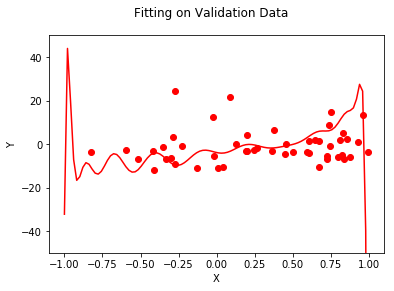

In [18]:
# The valid set
x = np.linspace(-1,1,100)
# x = data1_valid['Input'].sort_values()
fig = plt.figure()
plt.plot(x, f(x), 'r')
plt.plot(data1_valid['Input'], data1_test['Target'], 'ro')
fig.suptitle('Fitting on Validation Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.ylim(-50, 50)

(-50, 50)

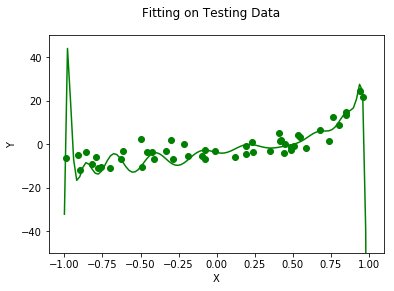

In [19]:
# The test set
x = np.linspace(-1,1,100)
# x = data1_test['Input'].sort_values()
fig = plt.figure()
plt.plot(x, f(x), 'g')
plt.plot(data1_test['Input'], data1_test['Target'], 'go')
fig.suptitle('Fitting on Testing Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.ylim(-50, 50)

### 2.1.c
See pdf for explanation.

## 2.2
### 2.2.a

In [20]:
def polyfit_lambda(X, Y, n, lambda_constant):
    m = np.size(X)
    matrix = np.zeros(shape=(m, n+1))
    for i in range(n+1):
        matrix[:,i] = X**i
    lambda_matrix = np.identity(n+1) * lambda_constant
    
    temp = inv(np.matmul(matrix.transpose(), matrix) + lambda_matrix)
    temp = np.matmul(temp, matrix.transpose())
    return np.matmul(temp, Y)

In [21]:
train_MSE = [0]*1000
valid_MSE = [0]*1000
for i in range(1000):
    parameters = polyfit_lambda(data1_train['Input'], data1_train['Target'], 20, 0.001*(i+1))
    train_MSE[i] = np.mean((polyval(data1_train['Input'], parameters) - data1_train['Target'])**2)
    valid_MSE[i] = np.mean((polyval(data1_valid['Input'], parameters) - data1_valid['Target'])**2)

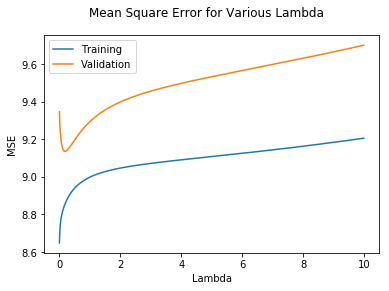

In [22]:
x = [0.01*i for i in range(1000)]
fig = plt.figure()
plt.plot(x, train_MSE)
plt.plot(x, valid_MSE)
fig.suptitle('Mean Square Error for Various Lambda')
plt.xlabel('Lambda')
plt.ylabel('MSE')
plt.legend(['Training', 'Validation'])

### 2.2.b

See explanation in pdf.

In [23]:
min(valid_MSE)

9.135098784694673

In [24]:
0.001*valid_MSE.index(min(valid_MSE))

0.019

In [25]:
parameters = polyfit_lambda(data1_train['Input'], data1_train['Target'], 20, 0.019)

In [26]:
prediction_train = polyval(data1_train['Input'], parameters)
MSE_train = np.mean((prediction_train - data1_train['Target'])**2)
MSE_train

8.853605908880628

In [27]:
prediction_valid = polyval(data1_valid['Input'], parameters)
MSE_valid = np.mean((prediction_valid - data1_valid['Target'])**2)
MSE_valid

9.135168641970278

In [28]:
prediction_test = polyval(data1_test['Input'], parameters)
MSE_test = np.mean((prediction_test - data1_test['Target'])**2)
MSE_test

10.737287856525224

### 2.2.c
See explanation in pdf.

Text(0,0.5,'Y')

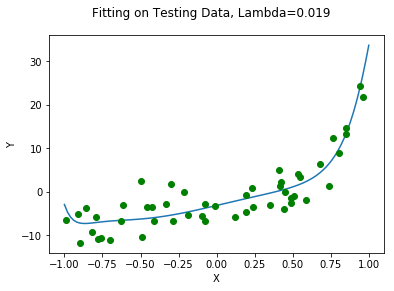

In [29]:
f = poly.Polynomial(parameters)
x = np.linspace(-1,1,100)
fig = plt.figure()
plt.plot(x, f(x))
plt.plot(data1_test['Input'], data1_test['Target'], 'go')
fig.suptitle('Fitting on Testing Data, Lambda=0.019')
plt.xlabel('X')
plt.ylabel('Y')

Text(0,0.5,'Y')

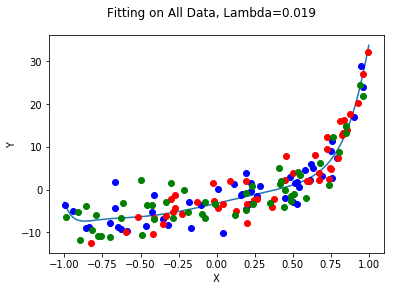

In [30]:
f = poly.Polynomial(parameters)
x = np.linspace(-1,1,100)
fig = plt.figure()
plt.plot(x, f(x))
fig.suptitle('Fitting on All Data, Lambda=0.019')
plt.plot(data1_train['Input'], data1_train['Target'], 'bo')
plt.plot(data1_valid['Input'], data1_valid['Target'], 'ro')
plt.plot(data1_test['Input'], data1_test['Target'], 'go')
plt.xlabel('X')
plt.ylabel('Y')

### 2.2.d
See explanation in pdf.

## 2.3
See explanation in pdf.


# 3. Gradient Descent for Regression

In [31]:
data2_train = pd.read_csv('Dataset_2_train.csv', header=None)
data2_valid = pd.read_csv('Dataset_2_valid.csv', header=None)
data2_test = pd.read_csv('Dataset_2_test.csv', header=None)

In [32]:
data2_train = data2_train.dropna(axis='columns')
data2_valid = data2_valid.dropna(axis='columns')
data2_test = data2_test.dropna(axis='columns')

data2_train.columns = ['Input', 'Target']
data2_valid.columns = ['Input', 'Target']
data2_test.columns = ['Input', 'Target']

## 3.1.
### 3.1.a

In [33]:
def SGD_LR(train, valid, n_epoch, step_size):
    n = len(train)
    parameters = [5, 5]
    error=float('inf')
    MSE=[0]*n_epoch
    for epoch in range(n_epoch):
        sum_error = 0
        np.random.shuffle(train)
        for i in range(n):
            yhat = parameters[0] + parameters[1]*train[i, 0]
            error = yhat - train[i, 1]
            sum_error += error**2
            parameters[0] += - step_size * error
            parameters[1] += - step_size * error * train[i, 0]
        MSE[epoch] = np.mean((parameters[0] + parameters[1]*valid[:,0] - valid[:,1])**2)
    return parameters, MSE

In [34]:
parameters, MSE = SGD_LR(data2_train.as_matrix(), data2_valid.as_matrix(), 5000, float('1e-6'))

Text(0,0.5,'MSE')

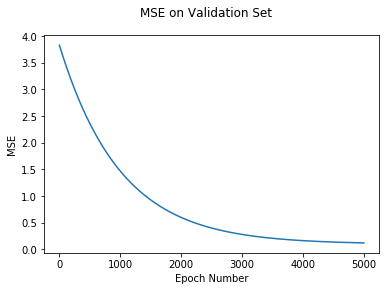

In [35]:
x = [i for i in range(len(MSE))]
fig = plt.figure()
plt.plot(x, MSE)
fig.suptitle('MSE on Validation Set')
plt.xlabel('Epoch Number')
plt.ylabel('MSE')

In [36]:
MSE[0]

3.8275091919341482

In [37]:
MSE[-1]

0.11920223412712046

### 3.1.b

In [38]:
def SGD_LR_sature(train, valid):
    n = len(train)
    step_size = float('1e-6')
    parameters = [5, 5]
    error=float('inf')
    MSE_train=[]
    MSE_valid=[]
    while abs(error)>0.0005:
        sum_error = 0
        np.random.shuffle(train)
        for i in range(n):
            yhat = parameters[0] + parameters[1]*train[i, 0]
            error = yhat - train[i, 1]
            sum_error += error**2
            parameters[0] += - step_size * error
            parameters[1] += - step_size * error * train[i, 0]
        MSE_train += [np.mean(( polyval(train[:,0], parameters) - train[:,1])**2)]
        MSE_valid += [np.mean(( polyval(valid[:,0], parameters) - valid[:,1])**2)]
    return parameters, MSE_train, MSE_valid

In [39]:
parameters, MSE_train, MSE_valid = SGD_LR_sature(data2_train.as_matrix(), data2_valid.as_matrix())

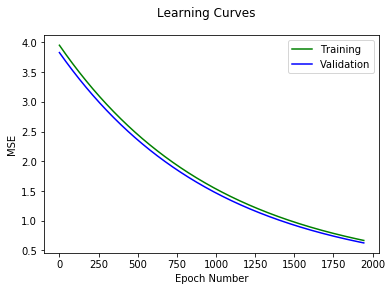

In [40]:
x = [i for i in range(len(MSE_train))]
fig = plt.figure()
plt.plot(x, MSE_train, 'g')
plt.plot(x, MSE_valid, 'b')
fig.suptitle('Learning Curves')
plt.xlabel('Epoch Number')
plt.ylabel('MSE')
plt.legend(['Training', 'Validation'])

In [41]:
MSE_train[-1]

0.66779253488314205

In [42]:
MSE_valid[-1]

0.62608987173579655

In [43]:
parameters

[4.2672605126839214, 4.4050668401420641]

## 3.2.a

In [44]:
MSE = np.zeros(shape=(11, 2))
for i in range(11):
    MSE[i, 0] = float('1e-'+str(i))
    MSE[i, 1] = np.mean(SGD_LR(data2_train.as_matrix(), data2_valid.as_matrix(), 5000, float('1e-'+str(i)))[1])

In [45]:
pd.DataFrame(data=MSE, columns=['Step Size', 'MSE'])

,Step Size,MSE
0,1.000000e+00,9.541691
1,1.000000e-01,0.082509
2,1.000000e-02,0.074531
3,1.000000e-03,0.074627
4,1.000000e-04,0.082404
5,1.000000e-05,0.159066
6,1.000000e-06,0.834815
7,1.000000e-07,3.034748
8,1.000000e-08,3.739353
9,1.000000e-09,3.821917


In [46]:
np.min(MSE[:,1])

0.074530607624607476

### 3.2.b
See pdf for explanation.

In [47]:
parameters, MSE = SGD_LR(data2_train.as_matrix(), data2_valid.as_matrix(), 5000, float('1e-2'))
test = data2_test.as_matrix()
MSE_test = np.mean(( polyval(test[:,0], parameters) - test[:,1])**2)

In [48]:
MSE_test

0.071125751254477856

In [49]:
parameters

[3.6042199349444313, 4.3444349345490796]

## 3.3

Text(0,0.5,'MSE')

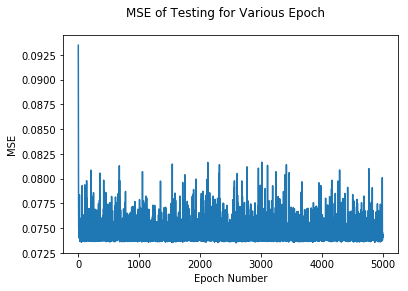

In [50]:
x = [i for i in range(len(MSE))]
fig = plt.figure()
plt.plot(x, MSE)
fig.suptitle('MSE of Testing for Various Epoch')
plt.xlabel('Epoch Number')
plt.ylabel('MSE')

(0, 10)

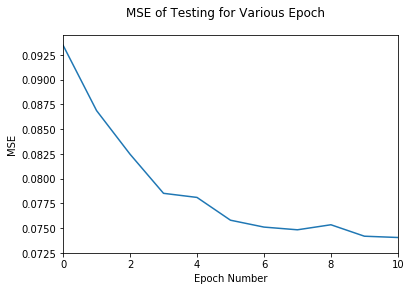

In [51]:
fig = plt.figure()
plt.plot(x, MSE)
fig.suptitle('MSE of Testing for Various Epoch')
plt.xlabel('Epoch Number')
plt.ylabel('MSE')
plt.xlim(0, 10)

In [52]:
def SGD_LR_memo(train, valid, n_epoch, step_size):
    n = len(train)
    error=float('inf')
    MSE=[0]*n_epoch
    parameters = [5, 5]
    parameters_memo = np.zeros(shape=(n_epoch, 2))
    for epoch in range(n_epoch):
        sum_error = 0
        np.random.shuffle(train)
        for i in range(n):
            yhat = parameters[0] + parameters[1]*train[i, 0]
            error = yhat - train[i, 1]
            sum_error += error**2
            parameters[0] += - step_size * error
            parameters[1] += - step_size * error * train[i, 0]
        MSE[epoch] = np.mean(( polyval(valid[:,0], parameters) - valid[:,1])**2)
        parameters_memo[epoch,0]=parameters[0]
        parameters_memo[epoch,1]=parameters[1]
    return parameters_memo, MSE

In [53]:
parameters_memo, MSE = SGD_LR_memo(data2_train.as_matrix(), data2_valid.as_matrix(), 10, float('1e-2'))

In [54]:
pd.DataFrame(data=parameters_memo, columns=['w0', 'w1'])

,w0,w1
0,3.793666,4.133994
1,3.701049,4.154855
2,3.676871,4.207014
3,3.665012,4.250860
4,3.599865,4.233281
5,3.602541,4.264183
6,3.622016,4.302046
7,3.613491,4.310949
8,3.600401,4.314689
9,3.571630,4.297026


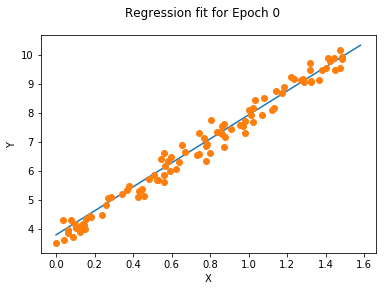

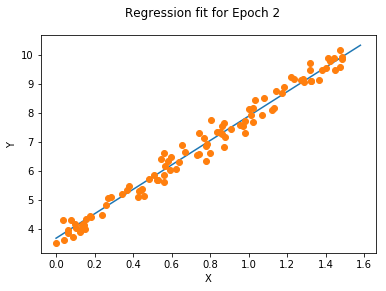

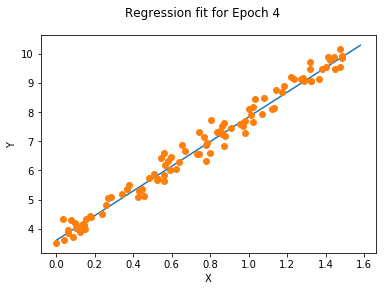

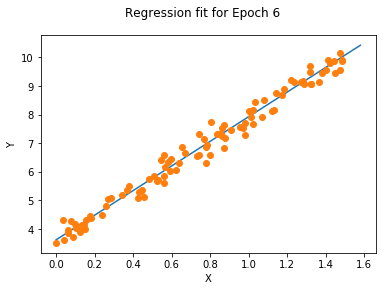

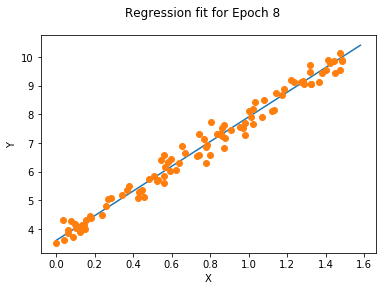

In [55]:
for i in range(5):
    x = [0.02*j for j in range(80)]
    f = [parameters_memo[2*i,0] + parameters_memo[2*i, 1]*j for j in x]
    fig = plt.figure()
    plt.plot(x, f)
    plt.plot(data2_test['Input'], data2_test['Target'], 'o')
    fig.suptitle('Regression fit for Epoch '+ str(2*i))
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()

# 4. Real Life Dataset
## 4.1

In [56]:
data3 = pd.read_csv('communities.data.txt', header=None)

In [57]:
len(data3)

1994

In [58]:
data3.head()

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,8,?,?,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,?,?,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,?,?,?,?,0.00,?,0.67
2,24,?,?,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,?,?,?,?,0.00,?,0.43
3,34,5,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,?,?,?,?,0.00,?,0.12
4,42,95,6096,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,?,?,?,?,0.00,?,0.03


In [59]:
data3_drop = data3.copy()
data3_drop = data3_drop.replace('?', np.NaN)
data3_drop = data3_drop.dropna()
print(len(data3_drop))

123


### 4.1.a

In [60]:
data3_mean = data3.copy()
data3_mean = data3_mean.replace('?', np.NaN)
data3_mean = data3_mean.apply(pd.to_numeric, errors='ignore')
data3_mean = data3_mean.fillna(data3_mean.mean())
data3_mean.head()

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,8,58.826829,46188.336597,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.060000,0.040000,0.900000,0.500000,0.32,0.140000,0.20
1,53,58.826829,46188.336597,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.67
2,24,58.826829,46188.336597,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.43
3,34,5.000000,81440.000000,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.12
4,42,95.000000,6096.000000,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.03


### 4.1.b

In [61]:
data3_median = data3.copy()
data3_median = data3_median.replace('?', np.NaN)
data3_median = data3_median.apply(pd.to_numeric, errors='ignore')
data3_median = data3_median.fillna(data3_median.median())
data3_median.head()

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,8,23.0,48090.0,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.90,0.5,0.32,0.14,0.20
1,53,23.0,48090.0,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,0.08,0.03,0.75,0.5,0.00,0.15,0.67
2,24,23.0,48090.0,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,0.08,0.03,0.75,0.5,0.00,0.15,0.43
3,34,5.0,81440.0,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,0.08,0.03,0.75,0.5,0.00,0.15,0.12
4,42,95.0,6096.0,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,0.08,0.03,0.75,0.5,0.00,0.15,0.03


In [62]:
data3_mode = data3.copy()
data3_mode = data3_mode.replace('?', np.NaN)
data3_mode = data3_mode.apply(pd.to_numeric, errors='ignore')
data3_mode = data3_mode.fillna(data3_mode.mode().iloc[0])
data3_mode.head()

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,8,3.0,1000.0,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.90,0.5,0.32,0.14,0.20
1,53,3.0,1000.0,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,0.02,0.02,0.74,0.0,0.00,0.12,0.67
2,24,3.0,1000.0,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,0.02,0.02,0.74,0.0,0.00,0.12,0.43
3,34,5.0,81440.0,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,0.02,0.02,0.74,0.0,0.00,0.12,0.12
4,42,95.0,6096.0,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,0.02,0.02,0.74,0.0,0.00,0.12,0.03


In [63]:
def random_sample(df2):
    df = df2.copy()
    for col in df.columns:
        data = df[col]
        mask = data.isnull()
        choices = data.dropna().values
        sampling = [random.choice(choices) for i in range(len(mask))]
        data[mask] = sampling
    return df

In [64]:
data3_sample = data3.copy()
data3_sample = data3_sample.replace('?', np.NaN)
data3_sample = data3_sample.apply(pd.to_numeric, errors='ignore')
data3_sample = random_sample(data3_sample)
data3_sample.head()

C:\Users\Di Zhang\Anaconda3\lib\site-packages\ipykernel\__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,8,21.0,2000.0,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.90,0.5,0.32,0.14,0.20
1,53,11.0,65790.0,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,0.03,0.01,0.91,1.0,0.00,0.21,0.67
2,24,3.0,68750.0,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,0.08,0.03,0.56,0.5,0.00,0.11,0.43
3,34,5.0,81440.0,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,0.09,0.04,0.74,0.5,0.00,0.13,0.12
4,42,95.0,6096.0,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,0.16,0.03,0.75,0.0,0.00,0.10,0.03


## 4.2

In [66]:
data = data3_sample.copy()
data = data.iloc[:,5:].as_matrix()
data = data.astype(float)
data = np.concatenate((np.array([1]*len(data))[:, np.newaxis], data), axis=1)

In [67]:
def linear_fit(X, Y):
    temp = inv(np.matmul(X.transpose(), X))
    temp = np.matmul(temp, X.transpose())
    return np.matmul(temp, Y)

In [68]:
MSE = [0]*5
w = [0]*5
new_data = np.copy(data)
np.random.shuffle(new_data)
stored_data = np.array_split(new_data, 5)
for i in range(5):
    temp = np.concatenate([stored_data[j] for j in range(5) if j != i], axis=0)
    X_train, X_test= temp[:,:123], stored_data[i][:,:123]
    Y_train, Y_test= temp[:,123], stored_data[i][:,123]
    np.savetxt('CandC-train'+str(i+1)+'.csv', temp, delimiter=",")
    np.savetxt('CandC-test'+str(i+1)+'.csv', stored_data[i], delimiter=",")
    w[i] = linear_fit(X_train, Y_train)
    yhat = np.matmul(X_test, w[i])
    MSE[i] = np.mean((yhat - Y_test)**2)

In [70]:
MSE

[0.017974186248498968,
 0.019888650473101351,
 0.017256634872176276,
 0.01876624172322619,
 0.022157915279290178]

In [71]:
min(MSE)

0.017256634872176276

In [72]:
np.mean(MSE)

0.01920872571925859

## 4.3
### 4.3.a

In [73]:
data = data3_sample.copy()
data = data.iloc[:,5:].as_matrix()
data = data.astype(float)
data = np.concatenate((np.array([1]*len(data))[:, np.newaxis], data), axis=1)

In [74]:
def linear_fit_L2(X, Y, lambda_constant):
    n = np.size(X[0])
    lambda_matrix = np.identity(n)*lambda_constant
    temp = inv(np.matmul(X.transpose(), X) + lambda_matrix)
    temp = np.matmul(temp, X.transpose())
    return np.matmul(temp, Y)

In [75]:
MSEs = np.zeros(shape=(5, 1000))
parameters = x = [[[] for i in range(1000)] for j in range(5)]
new_data2 = np.copy(data)
np.random.shuffle(new_data2)
stored_data = np.array_split(new_data, 5)
for i in range(5):
    temp = np.concatenate([stored_data[j] for j in range(5) if j != i], axis=0)
    X_train, X_test= temp[:,:123], stored_data[i][:,:123]
    Y_train, Y_test= temp[:,123], stored_data[i][:,123]
    np.savetxt('CandC-train'+str(i+1)+'Q4_3.csv', temp, delimiter=",")
    np.savetxt('CandC-test'+str(i+1) + 'Q4_3.csv', stored_data[i], delimiter=",")
    for j in range(1000):
        parameters[i][j] = linear_fit_L2(X_train, Y_train, 0.005*j)
        MSEs[i][j] = np.mean((np.matmul(X_test, parameters[i][j]) - Y_test)**2)

In [76]:
mean_MSE = [np.mean(MSEs[:,i]) for i in range(1000)]
list_lambda = [0.005*j for j in range(1000)]

Text(0,0.5,'Average Test MSE')

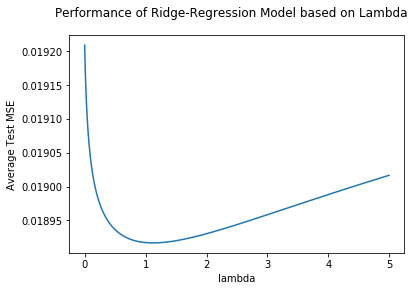

In [78]:
fig = plt.figure()
plt.plot(list_lambda, mean_MSE)
fig.suptitle('Performance of Ridge-Regression Model based on Lambda')
plt.xlabel('lambda')
plt.ylabel('Average Test MSE')

In [79]:
index = mean_MSE.index(min(mean_MSE)) 
list_lambda[index]

1.125

In [80]:
min(mean_MSE)

0.018916723398382872

In [81]:
allparameters = np.zeros(shape=(5, 123))
myParameters = np.zeros(123)
for i in range(5):
    for j in range(123):
        allparameters[i, j] = parameters[i][index][j]
        myParameters[j] += parameters[i][index][j]
myParameters = myParameters/5

### 4.3.b
See pdf for explanation.

In [83]:
myParameters

array([  1.68845140e-01,  -3.41136356e-02,   3.55792549e-02,
         1.94721208e-01,  -2.87647634e-02,  -6.97302923e-03,
         6.58659009e-02,   3.91418967e-02,  -1.13793724e-01,
        -4.33963531e-02,   9.01787106e-02,  -5.33713184e-02,
         4.14001805e-02,   2.33129624e-02,  -7.44719369e-02,
         3.82059835e-02,  -1.18919733e-01,   7.76748486e-02,
         3.56708040e-02,  -6.78829032e-02,   5.70975152e-02,
        -1.35683193e-02,  -1.25505258e-01,  -2.32181769e-02,
        -2.62311090e-02,   2.90640548e-02,   4.05568942e-02,
         2.54898297e-02,   2.80192508e-03,  -1.04913083e-01,
        -8.11200629e-02,   4.73583096e-02,   4.21297951e-02,
        -1.06713832e-02,   1.45354632e-01,  -5.05949852e-02,
        -1.35394117e-02,   6.58682951e-02,   6.24233982e-02,
         1.58668004e-01,   1.26762327e-01,  -5.79095946e-02,
        -9.53686103e-04,   3.83003947e-02,  -4.66756263e-02,
        -1.30381331e-01,  -4.41929735e-02,  -1.03720266e-02,
         3.05616681e-02,

### 4.3.c

In [84]:
np.mean((np.matmul(X_test, myParameters) - Y_test)**2)

0.019045475527504512

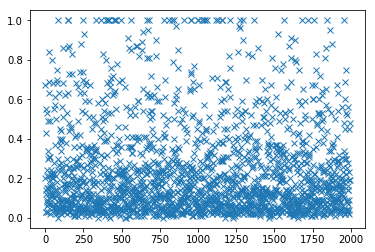

In [85]:
plt.plot(data[:, 123], 'x')

In [86]:
result = np.zeros(shape=(10, 2))
all_parameters = np.zeros(shape=(10, len(myParameters)))
for j in range(10):
    temp = myParameters.copy()
    dropped = 0
    for i in range(len(temp)):
        if abs(temp[i])<10**(-1*j):
            temp[i] = 0
            dropped+=1
    result[j, 1] = np.mean((np.matmul(X_test, temp) - Y_test)**2)
    result[j, 0] = 10**(-1*j)
    all_parameters[j] = temp
    
#     print(dropped, 10**(-1*j))

In [87]:
pd.DataFrame(data=result, columns=['Error margin', 'MSE'])

,Error margin,MSE
0,1.000000e+00,0.108680
1,1.000000e-01,0.024423
2,1.000000e-02,0.019405
3,1.000000e-03,0.019047
4,1.000000e-04,0.019045
5,1.000000e-05,0.019045
6,1.000000e-06,0.019045
7,1.000000e-07,0.019045
8,1.000000e-08,0.019045
9,1.000000e-09,0.019045


In [88]:
min(result[:,1])

0.019045475527504512

### 4.3.d
See pdf for explanation